In [3]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
df = pd.read_csv("Titanic-Dataset.csv")
#loading the datasets

In [4]:
#Describing and understanding the data set
df.info()
#Describe for all
df.describe()
#Describe for categorical columns
df.describe(include = "object")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


<Axes: >

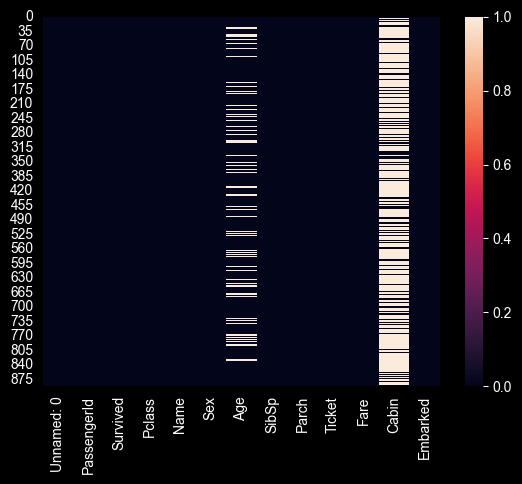

In [5]:
sns.heatmap(df.isnull())

In [6]:
#dropping the columns that we will not be need,e.g Passenger id ,Ticket ,etc.
df = df.drop(axis= 1,columns=['PassengerId',"Name","Ticket","Cabin","Unnamed: 0"])

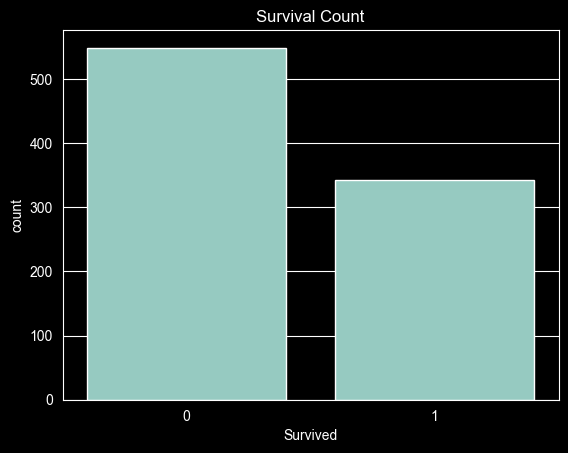

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [7]:
#observing the overall survival count.
sns.countplot(x = "Survived", data = df)
plt.title("Survival Count")
plt.show()
#Percentage of survival count.
df["Survived"].value_counts(normalize = True).mul(100)

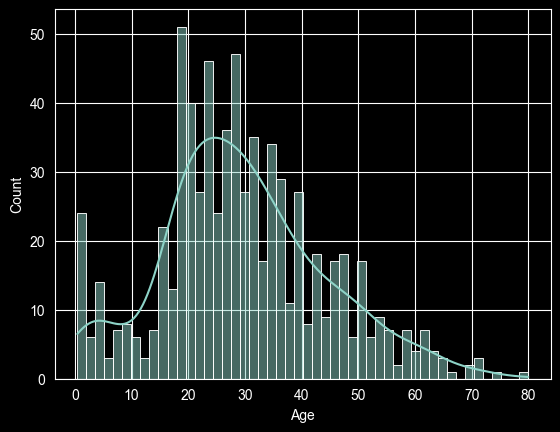

In [8]:
#Observing the age distribution of Ages.
sns.histplot(df["Age"].dropna(),bins=50,kde=True)
plt.show()

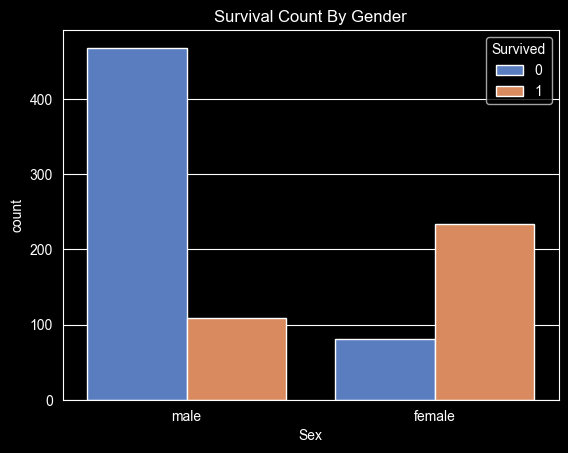

In [9]:
#Count of sex vs Survival to notice the whom among males and females Survived most.
sns.countplot(x = "Sex" ,hue = "Survived",data = df,palette = "muted")
plt.title("Survival Count By Gender")
plt.show()


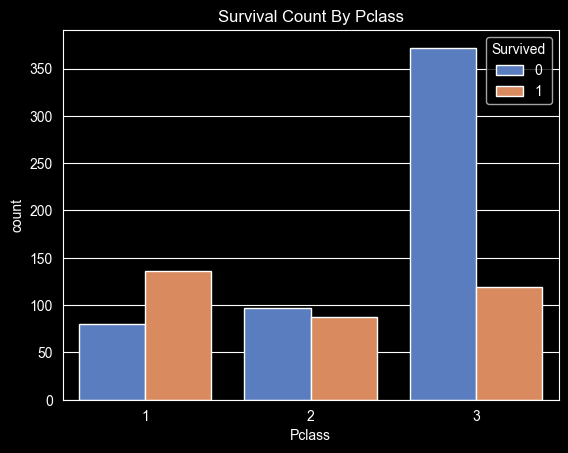

In [10]:
#Observing the survival rate vs Passenger class.
sns.countplot(x = "Pclass",hue = "Survived",data = df,palette = "muted")
plt.title("Survival Count By Pclass")
plt.show()

In [11]:
#getting a count and index of how many element/entries are null in the age column
#change the age data type from float to int.
#subtituting those entries with median of the whole age column
df["Age"] = pd.to_numeric(df["Age"],errors="coerce")
prblm = df["Age"] < 1
#filling the location of age sthat are less than 1 with the mean
df.loc[prblm,"Age"] = int(df["Age"].mean())
df["Age"]  = df["Age"].fillna(df["Age"].mean())
df["Age"] = [int(x) for x in list(df["Age"])]
#filling the rest of categorical data with the most frequent in column,e.g Embarked with 's'.
df = df.fillna(df.mode().iloc[0])



In [12]:
df.isnull().sum().sum()
#At this point there is no more in correct values or missing,this brought data cleaning to an end.


np.int64(0)

In [13]:
#Saving the Clean data in a new file for analysis.
df.to_csv("clean_titanic_data.csv",index=False)